In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import pandas as pd #we can also plot data directly from a Pandas framework

In [6]:
df_namerica = pd.read_csv('https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america_pie.csv', index_col='country')

We will use pandas groupby method to summarize the data by Country. The general process of groupby involves the following steps:

#### General process of groupby involves the following steps:

Split: Splitting the data into groups based on some criteria.
Apply: Applying a function to each group independently:
.sum()
.count()
.mean() 
.std() 
.aggregate()
.apply()
.etc..

Combine: Combining the results into a data structure.

In [7]:
# group countries by continents and apply sum() function 

df_countries = df_namerica.groupby('country', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())

print(type(df_namerica.groupby('country', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [8]:
df_countries

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007,Total
country,,,,,,,,,,,,,
Canada,11367.161120,12489.950060,13462.485550,16076.588030,18970.570860,22090.883060,22898.792140,26626.515030,26342.884260,28954.925890,33328.965070,36319.235010,268928.95610
Costa Rica,2627.009471,2990.010802,3460.937025,4161.727834,5118.146939,5926.876967,5262.734751,5629.915318,6160.416317,6677.045314,7723.447195,9645.061420,65383.32935
Cuba,5586.538780,6092.174359,5180.755910,5690.268015,5305.445256,6380.494966,7316.918107,7532.924763,5592.843963,5431.990415,6340.646683,8948.102923,75399.10414
Haiti,1840.366939,1726.887882,1796.589032,1452.057666,1654.456946,1874.298931,2011.159549,1823.015995,1456.309517,1341.726931,1270.364932,1201.637154,19448.87147
Jamaica,2898.530881,4756.525781,5246.107524,6124.703451,7433.889293,6650.195573,6068.051350,6351.237495,7404.923685,7121.924704,6994.774861,7320.880262,74371.74486
Mexico,3478.125529,4131.546641,4581.609385,5754.733883,6809.406690,7674.929108,9611.147541,8688.156003,9472.384295,9767.297530,10742.440530,11977.574960,92689.35210
Panama,2480.380334,2961.800905,3536.540301,4421.009084,5364.249663,5351.912144,7009.601598,7034.779161,6618.743050,7113.692252,7356.031934,9809.185636,69057.92606
United States,13990.482080,14847.127120,16173.145860,19530.365570,21806.035940,24072.632130,25009.559140,29884.350410,32003.932240,35767.433030,39097.099550,42951.653090,315133.81620


We will now pass in kind = **'pie'** keyword, along with the following additional parameters:

---
**autopct** - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.

**startangle** - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

**shadow** - Draws a shadow beneath the pie (to give a 3D feel).






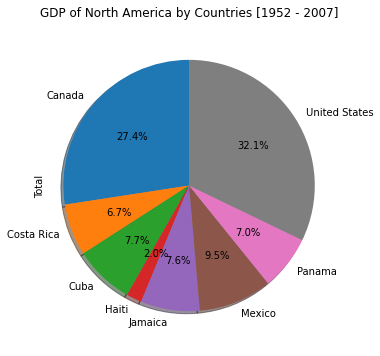

In [9]:
# autopct create %, start angle represent starting point

df_countries['Total'].plot(kind='pie',

                 figsize=(5, 6),

                 autopct='%1.1f%%', # add in percentages

                 startangle=90,     # start angle 90° (Africa)

                 shadow=True,       # add shadow      

                 )

plt.title('GDP of North America by Countries [1952 - 2007]')

plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()


The above visual is not very clear, the numbers and text overlap in some instances. Let us make a few modifications to improve the visuals:

Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using **plt.legend()**.

Push out the percentages to sit just outside the pie chart by passing in **pctdistance** parameter.


Pass in a custom set of colors for continents by passing in colors parameter.


Explode the pie chart to emphasize the top 3 countries with lowest GDP by pasing in **explode** parameter.

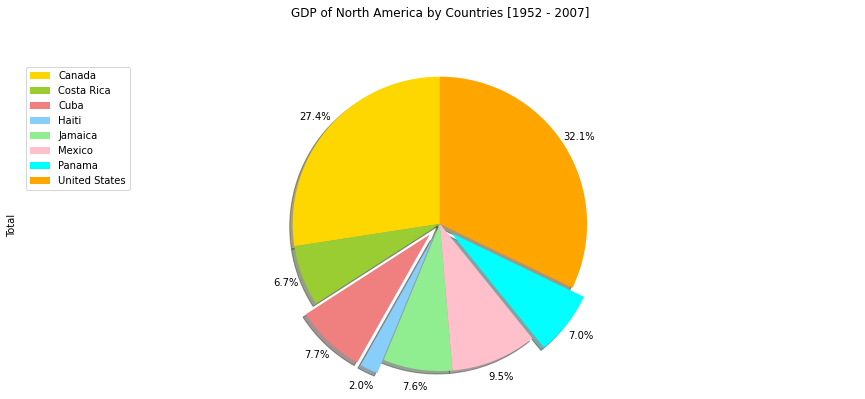

In [10]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'cyan', 'orange']

explode_list = [0, 0, 0.1, 0.1, 0, 0, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_countries['Total'].plot(kind='pie',

figsize=(15, 6),

autopct='%1.1f%%', 

startangle=90,    

shadow=True,       

labels=None,         # turn off labels on pie chart

pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 

colors=colors_list,  # add custom colors

explode=explode_list # 'explode' lowest 3 continents

)

# scale the title up by 12% to match pctdistance

plt.title('GDP of North America by Countries [1952 - 2007]', y=1.12) 

plt.axis('equal') 

# add legend

plt.legend(labels=df_countries.index, loc='upper left') 

plt.show()